In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df=pd.read_csv('Insurance Claim Fraud Detection.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [8]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.699900,11.644000,1.83900,0.992100,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096782,6.951373,1.01888,0.820134,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.100000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


<Axes: xlabel='fraud_reported', ylabel='count'>

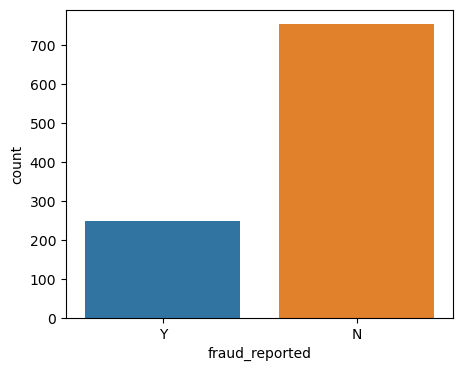

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(x='fraud_reported',data=df)

<Axes: xlabel='policy_state', ylabel='count'>

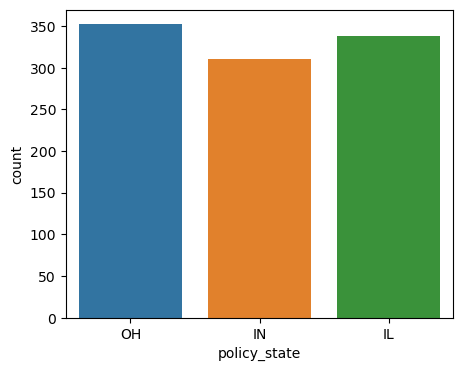

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x='policy_state',data=df)

<Axes: xlabel='incident_state', ylabel='count'>

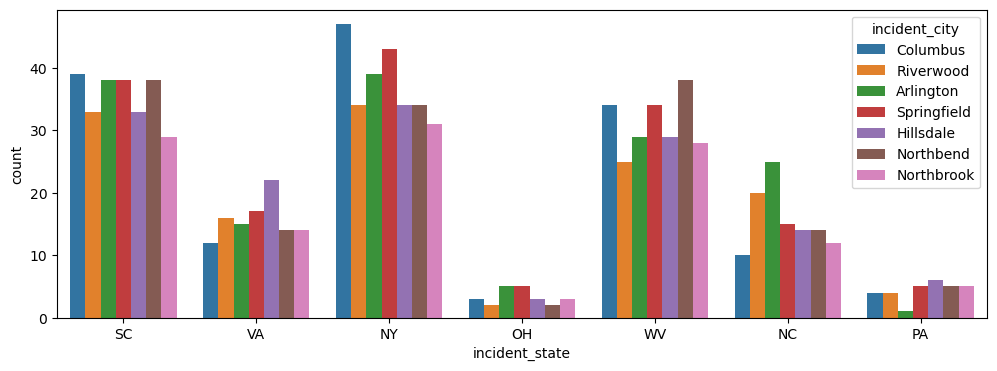

In [11]:
plt.figure(figsize=(12,4))
sns.countplot(x='incident_state',hue='incident_city',data=df)

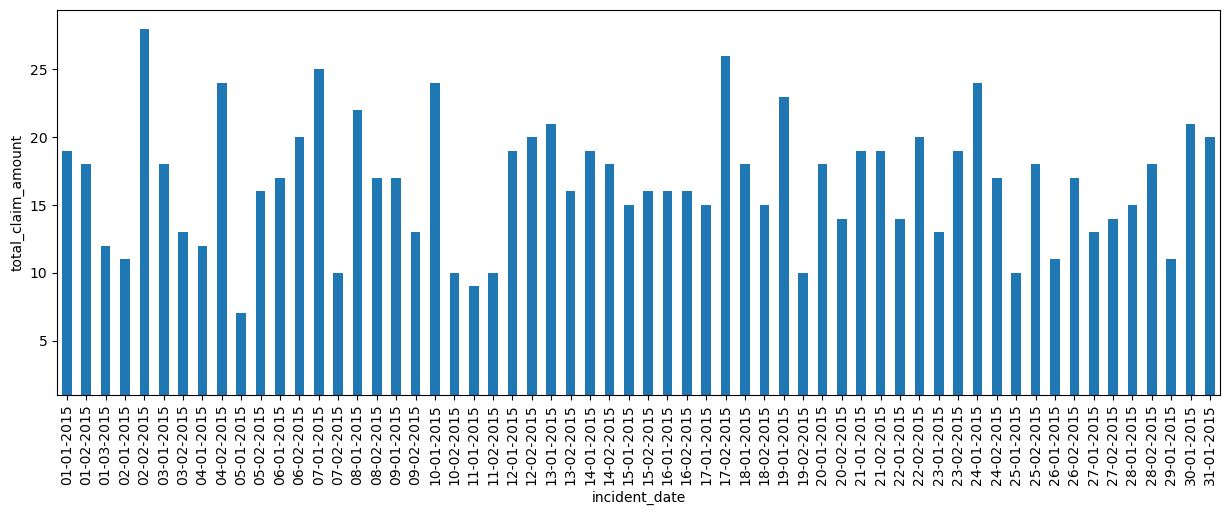

In [12]:
plt.figure(figsize=(15,5))
df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=1)
plt.xlabel('incident_date')
plt.ylabel('total_claim_amount')
plt.show()

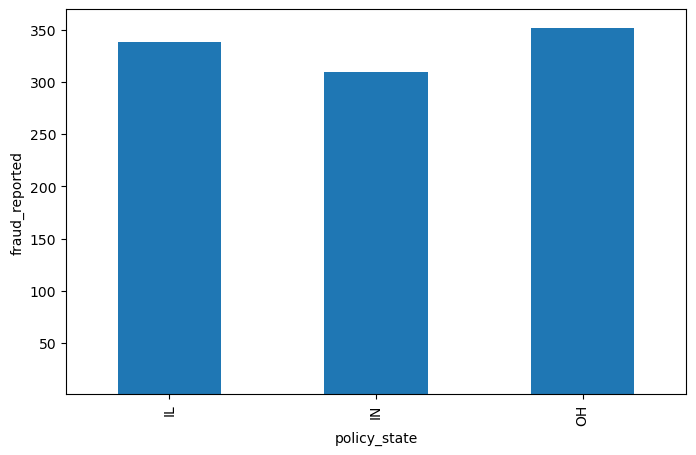

In [13]:
plt.figure(figsize=(8,5))
df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=1)
plt.xlabel('policy_state')
plt.ylabel('fraud_reported')
plt.show()

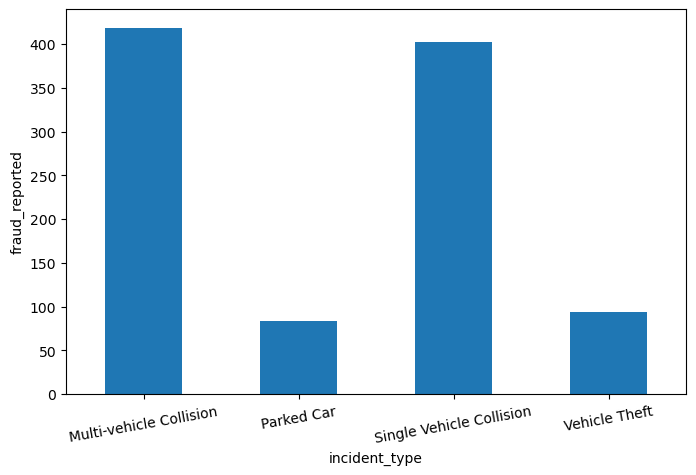

In [14]:
plt.figure(figsize=(8,5))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
plt.xlabel('incident_type')
plt.ylabel('fraud_reported')
plt.xticks(rotation=10)
plt.show()

<Axes: xlabel='insured_education_level', ylabel='count'>

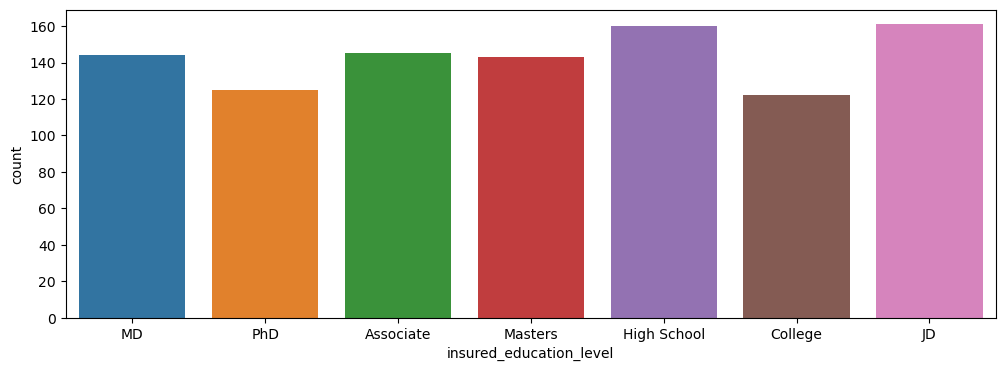

In [15]:
plt.figure(figsize=(12,4))
sns.countplot(x='insured_education_level',data=df)

<Axes: xlabel='insured_sex', ylabel='count'>

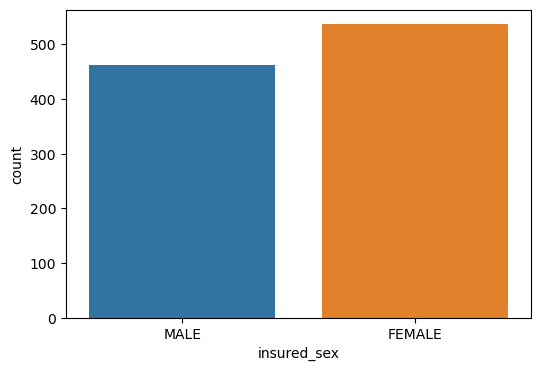

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='insured_sex',data=df)

<Axes: xlabel='insured_relationship', ylabel='count'>

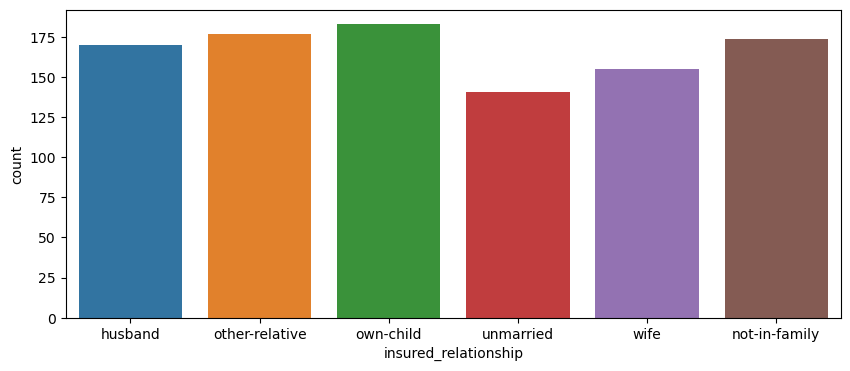

In [17]:
plt.figure(figsize=(10,4))
sns.countplot(x='insured_relationship',data=df)

<Axes: xlabel='authorities_contacted', ylabel='count'>

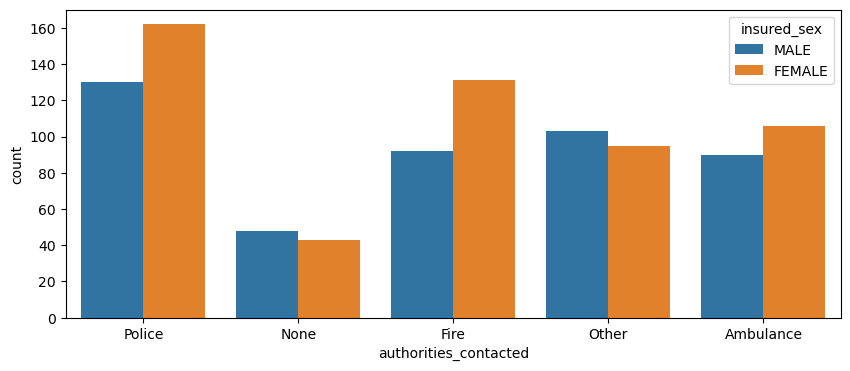

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(x='authorities_contacted',hue='insured_sex',data=df)

<Axes: xlabel='incident_type', ylabel='count'>

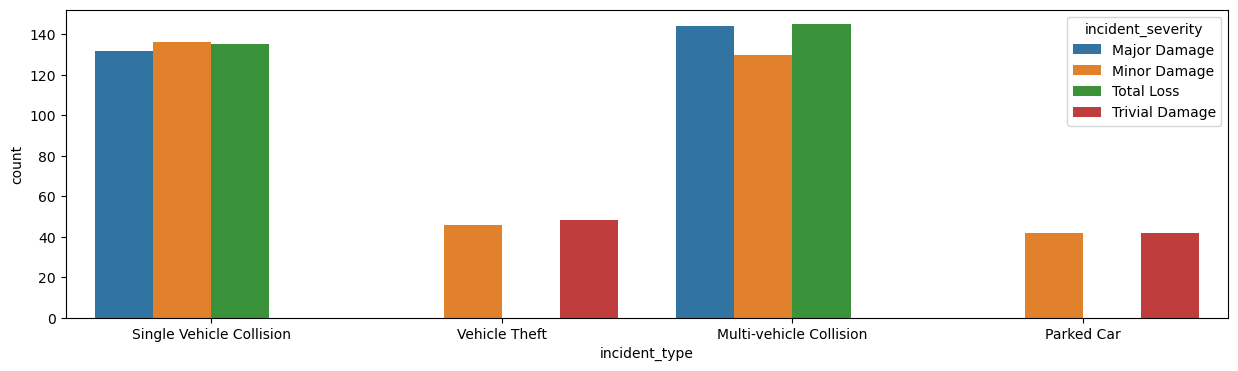

In [19]:
plt.figure(figsize=(15,4))
sns.countplot(x='incident_type',hue='incident_severity',data=df)

<Axes: xlabel='auto_make', ylabel='count'>

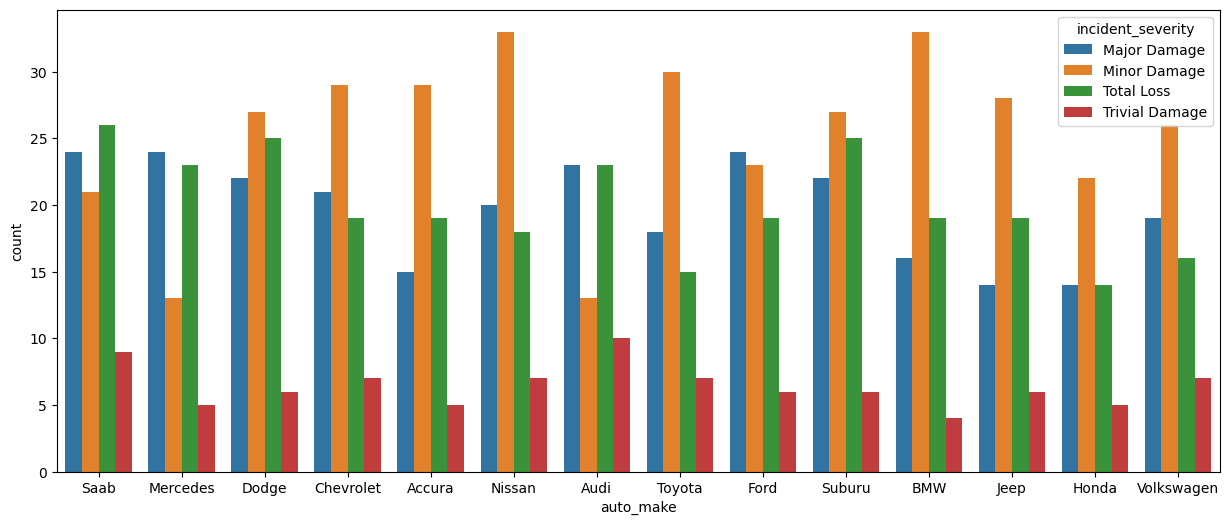

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(x='auto_make',hue='incident_severity',data=df)

In [21]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

<Axes: xlabel='insured_education_level', ylabel='count'>

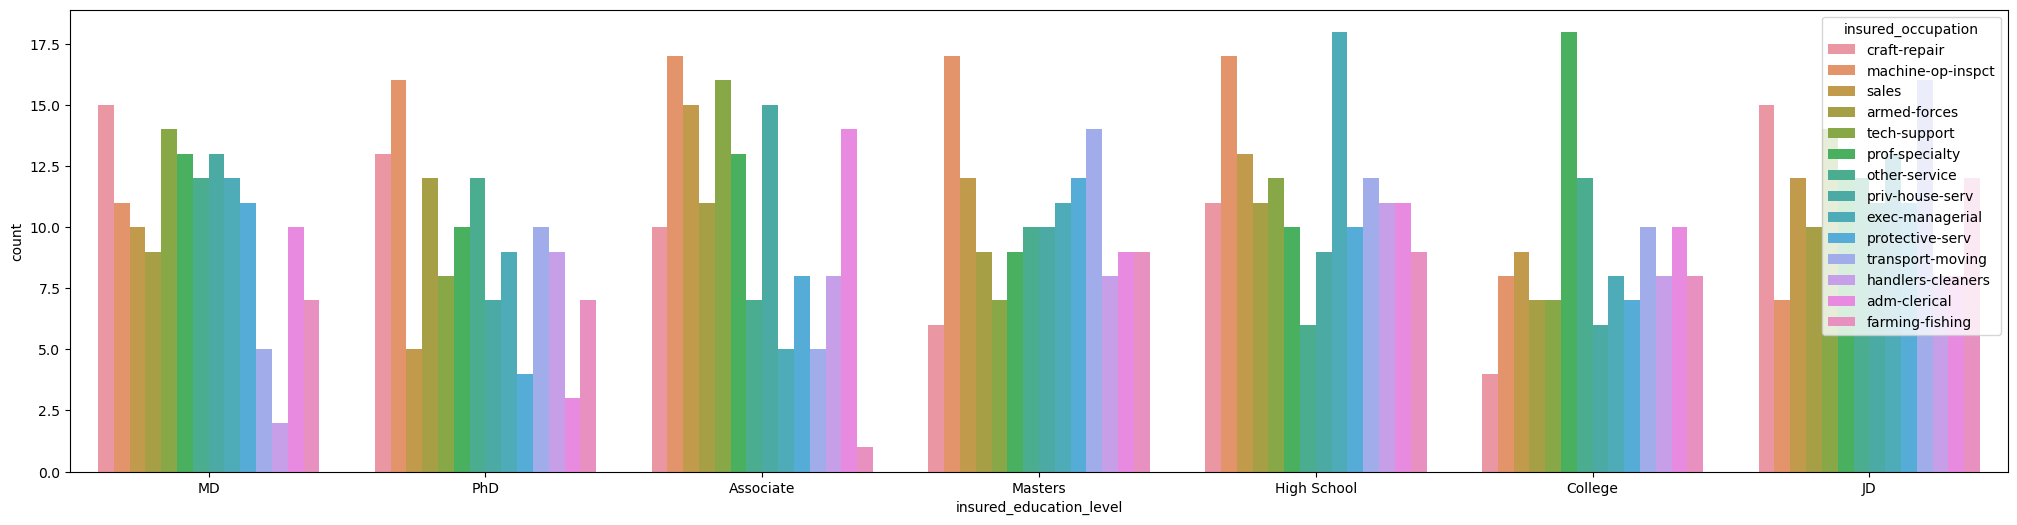

In [22]:
plt.figure(figsize=(25,6))
sns.countplot(x='insured_education_level',hue='insured_occupation',data=df)

In [23]:
df["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [24]:
#Data Preocessing

In [25]:
df['fraud_reported'].replace({'Y':1,'N':0}, inplace=True)

In [26]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [27]:
df['insured_zip'] = df['insured_zip'].astype(object)

In [28]:
df.auto_year.value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [29]:
df['vehicle_age'] = 2018 - df['auto_year']
df['vehicle_age'].head()

0    14
1    11
2    11
3     4
4     9
Name: vehicle_age, dtype: int64

In [30]:
df.select_dtypes(include=['object']).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model'],
      dtype='object')

In [31]:
df = df.drop(columns = ['policy_number','insured_zip','policy_bind_date','incident_date','incident_location','auto_year','incident_hour_of_the_day'])
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES.1,71610,6510,13020,52080,Saab,92x,1,14
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,?,5070,780,780,3510,Mercedes,E400,1,11
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,0,11
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1,4
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,0,9


In [32]:
new = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        new[i] = j
new = pd.DataFrame.from_dict(new, orient = 'index')
print(new)

                           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0


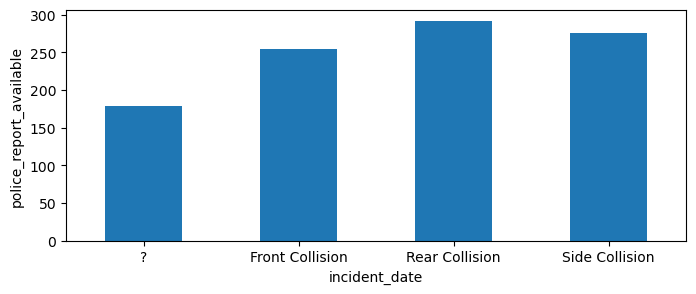

In [33]:
plt.figure(figsize=(8,3))
df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
plt.xlabel('incident_date')
plt.ylabel('police_report_available')
plt.xticks(rotation=0)
plt.show()

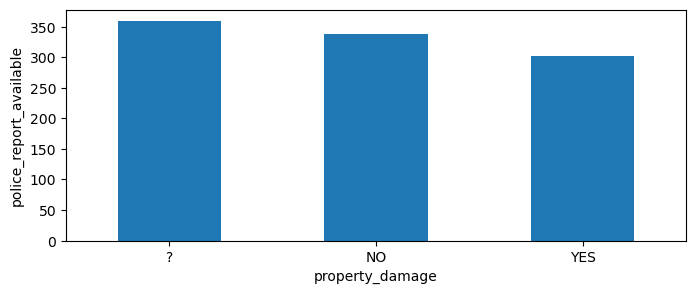

In [34]:
plt.figure(figsize=(8,3))
df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
plt.xlabel('property_damage')
plt.ylabel('police_report_available')
plt.xticks(rotation=0)
plt.show()

In [35]:
dummies = pd.get_dummies(df[['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','incident_severity','authorities_contacted','incident_state','incident_city','auto_make','auto_model']])
dummies = dummies.join(df[['collision_type','property_damage','police_report_available','fraud_reported']])
dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,collision_type,property_damage,police_report_available,fraud_reported
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,Side Collision,YES,YES.1,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,?,?,?,1
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,Rear Collision,NO,NO,0
3,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,Front Collision,?,NO,1
4,1,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,?,NO,NO,0


In [36]:
x = dummies.iloc[:, 0:-1]
y = dummies.iloc[:, -1]

In [37]:
len(x.columns)

138

In [38]:
x.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,collision_type,property_damage,police_report_available
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,Side Collision,YES,YES.1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,?,?,?
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,Rear Collision,NO,NO
3,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,Front Collision,?,NO
4,1,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,?,NO,NO


In [39]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder
x['collision_en'] = LabelEncoder().fit_transform(dummies['collision_type'])
x[['collision_type', 'collision_en']]

,collision_type,collision_en
0,Side Collision,3
1,?,0
2,Rear Collision,2
3,Front Collision,1
4,?,0
...,...,...
995,Front Collision,1
996,Rear Collision,2
997,Side Collision,3
998,Rear Collision,2


In [41]:
x['property_damage'].replace({'YES':1,'NO':0, '?':0}, inplace=True)
x['police_report_available'].replace({'YES':1,'YES.1':1,'NO':0, '?':0}, inplace=True)

In [42]:
x['police_report_available'].value_counts()

0    686
1    314
Name: police_report_available, dtype: int64

In [43]:
x = x.drop(columns = ['collision_type'])
x.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,3
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
x = pd.concat([x, df._get_numeric_data()], axis=1)
x.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,...,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,0,0,1,0,1,0,0,1,0,0,...,0.1,1,1.1,2,71610,6510,13020,52080,1,14
1,0,1,0,0,1,0,0,1,0,0,...,0.0,1,0.0,0,5070,780,780,3510,1,11
2,0,0,1,1,0,0,1,0,0,0,...,0.0,3,2.0,3,34650,7700,3850,23100,0,11
3,1,0,0,0,1,0,1,0,0,0,...,-62400.0,1,1.0,2,63400,6340,6340,50720,1,4
4,1,0,0,0,0,1,0,1,1,0,...,-46000.0,1,0.0,1,6500,1300,650,4550,0,9


In [45]:
x.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       ...
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object', length=154)

In [46]:
x = x.drop(columns = ['fraud_reported'])
x.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       ...
       'capital-gains', 'capital-loss', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'vehicle_age'],
      dtype='object', length=153)

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [48]:
x_train.shape

(800, 153)

In [49]:
x_test.shape

(200, 153)

In [50]:
print(y_test.shape)
print(y_train.shape)

(200,)
(800,)


In [77]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg
lg.fit(x_train,y_train)

LogisticRegression()

In [78]:
pred=lg.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [79]:
confusion_matrix(pred,y_test)

array([[150,  49],
       [  1,   0]], dtype=int64)

In [80]:
accuracy_score(pred,y_test)

0.75

In [81]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.75      0.86       199
           1       0.00      0.00      0.00         1

    accuracy                           0.75       200
   macro avg       0.50      0.38      0.43       200
weighted avg       0.99      0.75      0.85       200



In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [83]:
pred=dt.predict(x_test)

In [84]:
confusion_matrix(pred,y_test)

array([[128,  19],
       [ 23,  30]], dtype=int64)

In [85]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       147
           1       0.61      0.57      0.59        53

    accuracy                           0.79       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.79      0.79      0.79       200



In [86]:
accuracy_score(pred,y_test)

0.79

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [89]:
confusion_matrix(pred,y_test)

array([[128,  19],
       [ 23,  30]], dtype=int64)

In [90]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       147
           1       0.61      0.57      0.59        53

    accuracy                           0.79       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.79      0.79      0.79       200



In [91]:
accuracy_score(pred,y_test)

0.79

In [92]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [93]:
kn

KNeighborsClassifier()

In [94]:
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [95]:
confusion_matrix(pred,y_test)

array([[133,  45],
       [ 18,   4]], dtype=int64)

In [96]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       178
           1       0.08      0.18      0.11        22

    accuracy                           0.69       200
   macro avg       0.48      0.46      0.46       200
weighted avg       0.79      0.69      0.73       200



In [97]:
accuracy_score(pred,y_test)

0.685